# Parte 1: Data Science

## Apartado A

Lo primero que tengo que hacer es realizar un análisis exploratorio que explique los datos y conclusiones que se puedan sacar de ellos.

In [1]:
import pandas as pd

Como no sé cuál es el encoding del archivo, voy a averiguarlo.

In [3]:
import chardet

In [4]:
with open('prueba_tecnica/parte_1_DS/dataset.txt', 'rb') as f:
    result = chardet.detect(f.read())

In [5]:
print(result['encoding'])

ISO-8859-1


Ahora que tengo el encoding del archivo, voy a cargar el dataset en memoria y a mostrar sus características.

In [6]:
data = pd.read_csv('prueba_tecnica/parte_1_DS/dataset.txt', delimiter='\t', encoding=result['encoding'])

In [7]:
data

,AñoMes,N_Entrevista,A.1,A.2,A.3,A.4,A.9.1,A.9.2,B.2.1,B.2.2,...,F.1,F.2,F.3,G.1,G.2,G.3,G.4,G.6,G.12,G.13
0,201401,301100001,Aragón,400.001 a 1.000.000 habitantes,Mujer,68.0,Española,No procede,Regular,Igual,...,Viudo/a,No tiene pareja,La persona entrevistada,Pensionista (anteriormente no ha trabajado),N.P.,N.P.,"Asalariado/a fijo/a (a sueldo, comisión, jorna...",Jubilados/as y pensionistas,De 601 a 900 &euro;,De 601 a 900 &euro;
1,201401,301100002,Aragón,400.001 a 1.000.000 habitantes,Hombre,65 y más años {65 y +},Española,No procede,Regular,Igual,...,Casado/a,N.P.,La persona entrevistada,Jubilado/a o pensionista (anteriormente ha tra...,N.P.,N.P.,"Asalariado/a fijo/a (a sueldo, comisión, jorna...",Jubilados/as y pensionistas,De 901 a 1.200 &euro;,De 901 a 1.200 &euro;
2,201401,301100003,Aragón,400.001 a 1.000.000 habitantes,Hombre,51.0,Española,No procede,Buena,Igual,...,Soltero/a,No tiene pareja,La persona entrevistada,Trabaja,Nada probable,N.P.,"Asalariado/a fijo/a (a sueldo, comisión, jorna...",Técnicos/as y cuadros medios,De 3.001 a 4.500 &euro;,De 3.001 a 4.500 &euro;
3,201401,301100004,Aragón,400.001 a 1.000.000 habitantes,Hombre,38.0,Española,No procede,Regular,Igual,...,Casado/a,N.P.,La persona entrevistada,Trabaja,Poco probable,N.P.,"Asalariado/a fijo/a (a sueldo, comisión, jorna...",Técnicos/as y cuadros medios,De 1.201 a 1.800 &euro;,De 1.201 a 1.800 &euro;
4,201401,301100005,Aragón,400.001 a 1.000.000 habitantes,Mujer,50.0,Española,No procede,Buena,Igual,...,Casado/a,N.P.,(NO LEER) La persona entrevistada y otra casi ...,Trabaja,Poco probable,N.P.,"Asalariado/a eventual o interino/a (a sueldo, ...",Obreros/as no cualificados/as,De 2.401 a 3.000 &euro;,De 1.201 a 1.800 &euro;
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124027,201806,321702483,Melilla (Ciudad autónoma de),50.001 a 100.000 habitantes,Mujer,De 18 a 24 años {18-24},Española,No procede,Regular,Mejor,...,Soltero/a,No tiene pareja,Otra persona,Estudiante,N.P.,N.P.,"Asalariado/a fijo/a (a sueldo, comisión, jorna...",Estudiantes,De 601 a 900 &euro;,No tiene ingresos de ningún tipo
124028,201806,321702484,Melilla (Ciudad autónoma de),50.001 a 100.000 habitantes,Hombre,De 18 a 24 años {18-24},Española,No procede,Buena,Mejor,...,Soltero/a,No tiene pareja,Otra persona,Estudiante,N.P.,N.P.,"Asalariado/a fijo/a (a sueldo, comisión, jorna...",Estudiantes,De 601 a 900 &euro;,No tiene ingresos de ningún tipo
124029,201806,321702485,Melilla (Ciudad autónoma de),50.001 a 100.000 habitantes,Hombre,33.0,Española,No procede,Buena,Mejor,...,Soltero/a,Tiene pareja y comparten la misma vivienda,(NO LEER) La persona entrevistada y otra casi ...,Trabaja,Nada probable,N.P.,"Asalariado/a fijo/a (a sueldo, comisión, jorna...",Técnicos/as y cuadros medios,De 1.801 a 2.400 &euro;,De 901 a 1.200 &euro;
124030,201806,321702486,Melilla (Ciudad autónoma de),50.001 a 100.000 habitantes,Mujer,27.0,Española,No procede,Mala,Igual,...,Soltero/a,Tiene pareja pero no comparten la misma vivienda,Otra persona,Parado/a y ha trabajado antes,N.P.,Bastante probable,"Asalariado/a fijo/a (a sueldo, comisión, jorna...",Parados/as,De 601 a 900 &euro;,No tiene ingresos de ningún tipo


In [17]:
data.dtypes

AñoMes           int64
N_Entrevista     int64
A.1             object
A.2             object
A.3             object
A.4             object
A.9.1           object
A.9.2           object
B.2.1           object
B.2.2           object
C.3.1           object
D.1             object
D.2             object
D.3             object
E.2_2           object
E.2             object
F.1             object
F.2             object
F.3             object
G.1             object
G.2             object
G.3             object
G.4             object
G.6             object
G.12            object
G.13            object
dtype: object

¿Qué diferentes tipos de características (features) componen el dataset?

Pues tenemos características sociodemográficas básicas, valoraciones de la situación económica personal, características políticas, características personales, niveles de estudios de los entrevistados, situación civil y de convivencia de los entrevistados, al igual que características laborales y socioeconómicas.

Dentro de cada una de estas características generales, tenemos algunas más específicas, como pueden ser la edad o nacionalidad del entrevistado, escalas de ideología o de felicidad personal, estado civil, situación laboral del entrevistado, situación profesional o ingresos del hogar.

¿Todas las features son relevantes?

No considero que todas las características específicas sean relevantes, pues hay alguna que puede no influir en el análisis que se haga.

Las características que descartaría serían el tamaño de hábitat (A.2), la nacionalidad del entrevistado cuando es un extranjero (A.9.2), la valoración prospectiva de la situación económica personal (B.2.2), la frecuencia de asistencia a oficios religiosos del entrevistado (D.3) y la situación de convivencia de las personas no casadas (F.2)

Descartaría estas características porque no considero que sean completamente relevantes en el estudio científico de la sociedad española. Habría alguna de ellas que, dependiendo de cómo se entienda la característica al ser preguntado, sí podría ser relevante, pero no en general.

In [14]:
descarte = ['A.2','A.9.2','B.2.2','D.3','F.2']
ndata = data.drop(descarte,axis=1)

In [15]:
ndata

,AñoMes,N_Entrevista,A.1,A.3,A.4,A.9.1,B.2.1,C.3.1,D.1,D.2,...,E.2,F.1,F.3,G.1,G.2,G.3,G.4,G.6,G.12,G.13
0,201401,301100001,Aragón,Mujer,68.0,Española,Regular,4,NaN,Católico/a,...,Educación primaria,Viudo/a,La persona entrevistada,Pensionista (anteriormente no ha trabajado),N.P.,N.P.,"Asalariado/a fijo/a (a sueldo, comisión, jorna...",Jubilados/as y pensionistas,De 601 a 900 &euro;,De 601 a 900 &euro;
1,201401,301100002,Aragón,Hombre,65 y más años {65 y +},Española,Regular,5,NaN,Católico/a,...,Educación primaria,Casado/a,La persona entrevistada,Jubilado/a o pensionista (anteriormente ha tra...,N.P.,N.P.,"Asalariado/a fijo/a (a sueldo, comisión, jorna...",Jubilados/as y pensionistas,De 901 a 1.200 &euro;,De 901 a 1.200 &euro;
2,201401,301100003,Aragón,Hombre,51.0,Española,Buena,3,NaN,Ateo/a,...,Diplomado,Soltero/a,La persona entrevistada,Trabaja,Nada probable,N.P.,"Asalariado/a fijo/a (a sueldo, comisión, jorna...",Técnicos/as y cuadros medios,De 3.001 a 4.500 &euro;,De 3.001 a 4.500 &euro;
3,201401,301100004,Aragón,Hombre,38.0,Española,Regular,6,NaN,Católico/a,...,Arquitecto e Ingeniero Superior,Casado/a,La persona entrevistada,Trabaja,Poco probable,N.P.,"Asalariado/a fijo/a (a sueldo, comisión, jorna...",Técnicos/as y cuadros medios,De 1.201 a 1.800 &euro;,De 1.201 a 1.800 &euro;
4,201401,301100005,Aragón,Mujer,50.0,Española,Buena,4,NaN,Católico/a,...,Bachillerato,Casado/a,(NO LEER) La persona entrevistada y otra casi ...,Trabaja,Poco probable,N.P.,"Asalariado/a eventual o interino/a (a sueldo, ...",Obreros/as no cualificados/as,De 2.401 a 3.000 &euro;,De 1.201 a 1.800 &euro;
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124027,201806,321702483,Melilla (Ciudad autónoma de),Mujer,De 18 a 24 años {18-24},Española,Regular,N.S.,8,Creyente de otra religión,...,Bachillerato,Soltero/a,Otra persona,Estudiante,N.P.,N.P.,"Asalariado/a fijo/a (a sueldo, comisión, jorna...",Estudiantes,De 601 a 900 &euro;,No tiene ingresos de ningún tipo
124028,201806,321702484,Melilla (Ciudad autónoma de),Hombre,De 18 a 24 años {18-24},Española,Buena,4,8,Ateo/a,...,Bachillerato,Soltero/a,Otra persona,Estudiante,N.P.,N.P.,"Asalariado/a fijo/a (a sueldo, comisión, jorna...",Estudiantes,De 601 a 900 &euro;,No tiene ingresos de ningún tipo
124029,201806,321702485,Melilla (Ciudad autónoma de),Hombre,33.0,Española,Buena,5,9,Católico/a,...,Master oficial universitario,Soltero/a,(NO LEER) La persona entrevistada y otra casi ...,Trabaja,Nada probable,N.P.,"Asalariado/a fijo/a (a sueldo, comisión, jorna...",Técnicos/as y cuadros medios,De 1.801 a 2.400 &euro;,De 901 a 1.200 &euro;
124030,201806,321702486,Melilla (Ciudad autónoma de),Mujer,27.0,Española,Mala,4,4,Creyente de otra religión,...,Educación secundaria elemental,Soltero/a,Otra persona,Parado/a y ha trabajado antes,N.P.,Bastante probable,"Asalariado/a fijo/a (a sueldo, comisión, jorna...",Parados/as,De 601 a 900 &euro;,No tiene ingresos de ningún tipo


¿Todas las filas del dataset son válidas?

Dependiendo de lo que se quiera analizar, todas las filas son válidas, o puede haber alguna que no. 

Por ejemplo, en el caso de que queramos hacer un estudio sobre la información más actual posible, entonces deberíamos coger aquellas filas que sean del último año. Podemos querer solo información sobre las personas casadas, o aquellas mayores de 55 años.

Por ello, dependiendo de lo que busquemos, descartamos unas filas u otras.

En este caso, yo voy a querer información solo del año 2018, que se hayan situado en el 5 en la escala de autoubicación ideológica, y que estén casados.

In [18]:
ndata.dtypes

AñoMes           int64
N_Entrevista     int64
A.1             object
A.3             object
A.4             object
A.9.1           object
B.2.1           object
C.3.1           object
D.1             object
D.2             object
E.2_2           object
E.2             object
F.1             object
F.3             object
G.1             object
G.2             object
G.3             object
G.4             object
G.6             object
G.12            object
G.13            object
dtype: object

In [21]:
selec18 = ndata[ndata['AñoMes'].astype(str).str.startswith('2018')]

In [22]:
selec18

,AñoMes,N_Entrevista,A.1,A.3,A.4,A.9.1,B.2.1,C.3.1,D.1,D.2,...,E.2,F.1,F.3,G.1,G.2,G.3,G.4,G.6,G.12,G.13
109169,201801,320300001,País Vasco,Mujer,37.0,Española,Buena,4,9,No creyente,...,Licenciado,Casado/a,La persona entrevistada,Trabaja,Poco probable,N.P.,"Asalariado/a fijo/a (a sueldo, comisión, jorna...",Técnicos/as y cuadros medios,N.S.,De 1.801 a 2.400 &euro;
109170,201801,320300002,País Vasco,Hombre,33.0,Española,Regular,3,10 Completamente feliz,No creyente,...,Licenciado,Soltero/a,La persona entrevistada,Trabaja,N.S.,N.P.,"Asalariado/a fijo/a (a sueldo, comisión, jorna...",Directores/as y profesionales,De 1.801 a 2.400 &euro;,De 1.801 a 2.400 &euro;
109171,201801,320300003,País Vasco,Mujer,59.0,Española,Buena,6,8,Católico/a,...,FP de grado superior,Casado/a,Otra persona,Parado/a y ha trabajado antes,N.P.,N.S.,"Asalariado/a fijo/a (a sueldo, comisión, jorna...",Parados/as,De 2.401 a 3.000 &euro;,N.C.
109172,201801,320300004,País Vasco,Mujer,51.0,Española,Buena,4,7,No creyente,...,Bachillerato,Casado/a,Otra persona,Trabajo doméstico no remunerado,N.P.,N.P.,"Asalariado/a fijo/a (a sueldo, comisión, jorna...",Trabajo doméstico no remunerado,N.C.,N.C.
109173,201801,320300005,País Vasco,Hombre,42.0,Española,Buena,4,9,No creyente,...,Arquitecto e Ingeniero Superior,Soltero/a,La persona entrevistada,Trabaja,Nada probable,N.P.,Profesional o trabajador/a autónomo/a (sin asa...,Pequeños/as empresarios/as,N.C.,N.C.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124027,201806,321702483,Melilla (Ciudad autónoma de),Mujer,De 18 a 24 años {18-24},Española,Regular,N.S.,8,Creyente de otra religión,...,Bachillerato,Soltero/a,Otra persona,Estudiante,N.P.,N.P.,"Asalariado/a fijo/a (a sueldo, comisión, jorna...",Estudiantes,De 601 a 900 &euro;,No tiene ingresos de ningún tipo
124028,201806,321702484,Melilla (Ciudad autónoma de),Hombre,De 18 a 24 años {18-24},Española,Buena,4,8,Ateo/a,...,Bachillerato,Soltero/a,Otra persona,Estudiante,N.P.,N.P.,"Asalariado/a fijo/a (a sueldo, comisión, jorna...",Estudiantes,De 601 a 900 &euro;,No tiene ingresos de ningún tipo
124029,201806,321702485,Melilla (Ciudad autónoma de),Hombre,33.0,Española,Buena,5,9,Católico/a,...,Master oficial universitario,Soltero/a,(NO LEER) La persona entrevistada y otra casi ...,Trabaja,Nada probable,N.P.,"Asalariado/a fijo/a (a sueldo, comisión, jorna...",Técnicos/as y cuadros medios,De 1.801 a 2.400 &euro;,De 901 a 1.200 &euro;
124030,201806,321702486,Melilla (Ciudad autónoma de),Mujer,27.0,Española,Mala,4,4,Creyente de otra religión,...,Educación secundaria elemental,Soltero/a,Otra persona,Parado/a y ha trabajado antes,N.P.,Bastante probable,"Asalariado/a fijo/a (a sueldo, comisión, jorna...",Parados/as,De 601 a 900 &euro;,No tiene ingresos de ningún tipo


In [29]:
selec = selec18[selec18['C.3.1'] == '5']

In [30]:
selec

,AñoMes,N_Entrevista,A.1,A.3,A.4,A.9.1,B.2.1,C.3.1,D.1,D.2,...,E.2,F.1,F.3,G.1,G.2,G.3,G.4,G.6,G.12,G.13
109175,201801,320300007,País Vasco,Hombre,72.0,Española,Regular,5,9,Católico/a,...,FP de grado superior,Casado/a,La persona entrevistada,Jubilado/a o pensionista (anteriormente ha tra...,N.P.,N.P.,"Asalariado/a fijo/a (a sueldo, comisión, jorna...",Jubilados/as y pensionistas,N.C.,N.C.
109178,201801,320300010,País Vasco,Mujer,48.0,Española,Regular,5,5,No creyente,...,FP de grado superior,N.C.,La persona entrevistada,Trabaja,N.S.,N.P.,"Asalariado/a eventual o interino/a (a sueldo, ...",Técnicos/as y cuadros medios,N.C.,De 1.201 a 1.800 &euro;
109194,201801,320300026,Castilla-La Mancha,Mujer,51.0,Española,Buena,5,9,Católico/a,...,FP de grado medio,Casado/a,Otra persona,Trabaja,Poco probable,N.P.,"Asalariado/a fijo/a (a sueldo, comisión, jorna...",Técnicos/as y cuadros medios,De 1.201 a 1.800 &euro;,De 601 a 900 &euro;
109206,201801,320300038,Comunitat Valenciana,Hombre,51.0,Española y otra,Regular,5,8,Católico/a,...,Educación primaria,Casado/a,La persona entrevistada,Trabaja,Poco probable,N.P.,Profesional o trabajador/a autónomo/a (sin asa...,Pequeños/as empresarios/as,De 2.401 a 3.000 &euro;,De 1.201 a 1.800 &euro;
109209,201801,320300041,Comunitat Valenciana,Hombre,34.0,Española,Regular,5,8,Católico/a,...,FP de grado superior,Casado/a,La persona entrevistada,Trabaja,Nada probable,N.P.,"Asalariado/a fijo/a (a sueldo, comisión, jorna...",Técnicos/as y cuadros medios,De 2.401 a 3.000 &euro;,De 1.201 a 1.800 &euro;
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124021,201806,321702477,Aragón,Hombre,De 35 a 44 años {35-44},Española,Buena,5,10 Completamente feliz,Católico/a,...,FP de grado superior,Casado/a,(NO LEER) La persona entrevistada y otra casi ...,Trabaja,Nada probable,N.P.,"Asalariado/a fijo/a (a sueldo, comisión, jorna...",Obreros/as cualificados/as,De 2.401 a 3.000 &euro;,De 1.201 a 1.800 &euro;
124022,201806,321702478,Aragón,Hombre,22.0,Española,Regular,5,5,Creyente de otra religión,...,Educación secundaria elemental,Soltero/a,Otra persona,Trabaja,Bastante probable,N.P.,"Asalariado/a eventual o interino/a (a sueldo, ...",Obreros/as no cualificados/as,De 601 a 900 &euro;,De 301 a 600 &euro;
124023,201806,321702479,Ceuta (Ciudad autónoma de),Mujer,21.0,Española,Buena,5,7,Creyente de otra religión,...,Bachillerato,Soltero/a,Otra persona,Estudiante,N.P.,N.P.,"Asalariado/a fijo/a (a sueldo, comisión, jorna...",Estudiantes,N.S.,No tiene ingresos de ningún tipo
124024,201806,321702480,Ceuta (Ciudad autónoma de),Hombre,20.0,Española,Regular,5,9,Católico/a,...,Bachillerato,Soltero/a,Otra persona,Estudiante,N.P.,N.P.,"Asalariado/a fijo/a (a sueldo, comisión, jorna...",Estudiantes,N.S.,No tiene ingresos de ningún tipo


In [31]:
final = selec[selec['F.1'] == 'Casado/a']

In [32]:
final

,AñoMes,N_Entrevista,A.1,A.3,A.4,A.9.1,B.2.1,C.3.1,D.1,D.2,...,E.2,F.1,F.3,G.1,G.2,G.3,G.4,G.6,G.12,G.13
109175,201801,320300007,País Vasco,Hombre,72.0,Española,Regular,5,9,Católico/a,...,FP de grado superior,Casado/a,La persona entrevistada,Jubilado/a o pensionista (anteriormente ha tra...,N.P.,N.P.,"Asalariado/a fijo/a (a sueldo, comisión, jorna...",Jubilados/as y pensionistas,N.C.,N.C.
109194,201801,320300026,Castilla-La Mancha,Mujer,51.0,Española,Buena,5,9,Católico/a,...,FP de grado medio,Casado/a,Otra persona,Trabaja,Poco probable,N.P.,"Asalariado/a fijo/a (a sueldo, comisión, jorna...",Técnicos/as y cuadros medios,De 1.201 a 1.800 &euro;,De 601 a 900 &euro;
109206,201801,320300038,Comunitat Valenciana,Hombre,51.0,Española y otra,Regular,5,8,Católico/a,...,Educación primaria,Casado/a,La persona entrevistada,Trabaja,Poco probable,N.P.,Profesional o trabajador/a autónomo/a (sin asa...,Pequeños/as empresarios/as,De 2.401 a 3.000 &euro;,De 1.201 a 1.800 &euro;
109209,201801,320300041,Comunitat Valenciana,Hombre,34.0,Española,Regular,5,8,Católico/a,...,FP de grado superior,Casado/a,La persona entrevistada,Trabaja,Nada probable,N.P.,"Asalariado/a fijo/a (a sueldo, comisión, jorna...",Técnicos/as y cuadros medios,De 2.401 a 3.000 &euro;,De 1.201 a 1.800 &euro;
109212,201801,320300044,Comunitat Valenciana,Mujer,43.0,Española,Regular,5,9,Católico/a,...,Bachillerato,Casado/a,Otra persona,Parado/a y ha trabajado antes,N.P.,Nada probable,"Asalariado/a fijo/a (a sueldo, comisión, jorna...",Parados/as,N.C.,N.C.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124005,201806,321702461,Aragón,Hombre,68.0,Española,Regular,5,8,Católico/a,...,Educación secundaria elemental,Casado/a,La persona entrevistada,Jubilado/a o pensionista (anteriormente ha tra...,N.P.,N.P.,"Asalariado/a fijo/a (a sueldo, comisión, jorna...",Jubilados/as y pensionistas,De 901 a 1.200 &euro;,De 901 a 1.200 &euro;
124006,201806,321702462,Aragón,Mujer,47.0,Española,Muy buena,5,9,Católico/a,...,Licenciado,Casado/a,(NO LEER) La persona entrevistada y otra casi ...,Trabaja,Nada probable,N.P.,Empresario/a o profesional con asalariados/as,Directores/as y profesionales,De 2.401 a 3.000 &euro;,De 1.201 a 1.800 &euro;
124009,201806,321702465,Aragón,Hombre,49.0,Española,Regular,5,10 Completamente feliz,Católico/a,...,Educación secundaria elemental,Casado/a,La persona entrevistada,Trabaja,Nada probable,N.P.,"Asalariado/a fijo/a (a sueldo, comisión, jorna...",Obreros/as cualificados/as,De 901 a 1.200 &euro;,De 901 a 1.200 &euro;
124018,201806,321702474,Aragón,Mujer,68.0,Española,Buena,5,7,Católico/a,...,Educación primaria,Casado/a,Otra persona,Trabajo doméstico no remunerado,N.P.,N.P.,Profesional o trabajador/a autónomo/a (sin asa...,Trabajo doméstico no remunerado,De 901 a 1.200 &euro;,No tiene ingresos de ningún tipo


## Apartado B

Lo que tengo que hacer ahora es realizar una predicción sobre la variable D.1 Escala de felicidad personal (0-10). Puedo realizarlo como una regresión o como un problema de clasificación.

Voy a mostrar de forma gráfica cómo se distribuye el grado de felicidad de los encuestados.

In [60]:
import matplotlib.pyplot as plt
import numpy as np

In [158]:
d = data[['D.1']]

In [159]:
d

,D.1
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
124027,8
124028,8
124029,9
124030,4


Como tengo valores que son Nan, N.C., N.S., 0 Completamente infeliz y 10 Completamente feliz, lo que voy a hacer es cambiarlos por, 20, 30, 40, 0 y 10, respectivamente. Y después cambiaré el tipo del resto de valores, de object a int.

In [160]:
d['D.1'] = d['D.1'].fillna(20)

C:\Users\noaca\AppData\Local\Temp/ipykernel_9488/2547142183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['D.1'] = d['D.1'].fillna(20)


In [161]:
d

,D.1
0,20
1,20
2,20
3,20
4,20
...,...
124027,8
124028,8
124029,9
124030,4


In [162]:
for i in range(len(d)):
    if d['D.1'].iloc[i] == 'N.C.':
        d['D.1'].iloc[i] = 30
    elif d['D.1'].iloc[i] == 'N.S.':
        d['D.1'].iloc[i] = 40
    elif d['D.1'].iloc[i] == '0 Completamente infeliz':
        d['D.1'].iloc[i] = 0
    elif d['D.1'].iloc[i] == '10 Completamente feliz':
        d['D.1'].iloc[i] = 10
    else:
        d['D.1'].iloc[i] = int(d['D.1'].iloc[i])

c:\Users\noaca\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [163]:
n = len(d)
bins = int(np.sqrt(n))

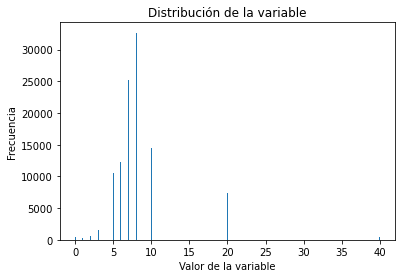

In [164]:
plt.hist(d, bins=bins)
plt.xlabel('Valor de la variable')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable')
plt.show()

Ahora voy a realizar una predicción de la variable D.1.

In [180]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [179]:
x = data.drop('D.1', axis=1)
y = data['D.1']

In [181]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [182]:
model = LinearRegression()

In [183]:
model.fit(x_train, y_train)

ValueError: could not convert string to float: 'Comunitat Valenciana'